<a href="https://colab.research.google.com/github/steed360/Data-Analysis/blob/main/Quantifying_Campaign_Uncertainty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
#import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import seaborn as sns
#from scipy.interpolate import griddata


**Purpose of this Notebook**

Tool for predicting campaign effectiveness.  

A previous campaign contacted 1000 people and had a response rate of 5%. Repeating the campaign, how many responses can be expected?

Assuming an underlying Bernouilli variable (response rate) of 0.05 (5%), show different ways to apply this in predicting the expected number of responses to a new campaign. 

The 5 ways this can be done:

??) Assume no knowledge at all. Here we'll 

a)  Apply a fixed point (multiply the unseen sample by 0.05). So to find the expected response rate, simply  multiply the number of people to be contacted by 0.05. 

b)   Apply fixed points but acknowledge the uncertainty that 0.05 is the right point to use (on account of sampling distributions). The fixed points will be the lower and upper bounds of the 90% confidence interval.

c)  Instead of applying fixed points apply all of the **sampling distribution as fixed points**. Sample a lot of response ratepoints from the sampling distribution, sample a response probability from the sampling distribution. Because response rates closer to 0.05 are more plausible, they will be selected more often. Hence, 

d)  As 




In [7]:
Original_Campaign_Size = 1000 # sample size

In [3]:
New_Campaign_Size = 1000

In [11]:
Original_Response_Rate  = 0.05  # NB: Assumption is IID Bernouilli variable

In [12]:
Original_Campaign_Responses = Original_Campaign_Size * Original_Response_Rate
Original_Campaign_Responses

50.0

**A) Apply fixed point statistic**

In [14]:
New_Campaign_Responses = New_Campaign_Size * Original_Response_Rate
New_Campaign_Responses

50.0

**B) Account for Sampling Error in the Original Distribution**

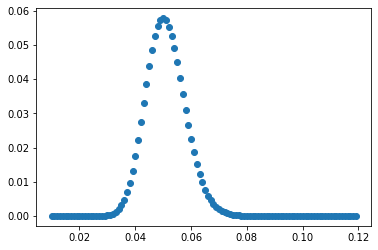

In [62]:
# Set up a list of underlying possible response_rates 

grid_points = 1000
p_grid = np.linspace ( 0, 1, grid_points )
ustd_posterior = stats.binom.pmf ( k=New_Campaign_Responses, n=Original_Campaign_Size, p= p_grid ) * np.repeat ( 5, grid_points )
posterior = ustd_posterior / ustd_posterior.sum()
plt.plot (p_grid[10:120], posterior[10:120], 'o')